<a href="https://colab.research.google.com/github/anagha1112/MALL_CUSTOMER_SEGMENTATION/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vjchoudhary7_customer_segmentation_tutorial_in_python_path = kagglehub.dataset_download('vjchoudhary7/customer-segmentation-tutorial-in-python')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os

import kagglehub
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.csv'):  # only pick CSV files
            file_path = os.path.join(dirname, filename)
            df = pd.read_csv(file_path)
            print(f"Loaded: {file_path}")
            break  # load the first CSV and break


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Loaded: /kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


Prinitng first few rows of the datafrane

In [31]:

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,label
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,3,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,3,4
4,5,Female,31,17,40,0,0


In [4]:
df.shape

(200, 5)

In [5]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


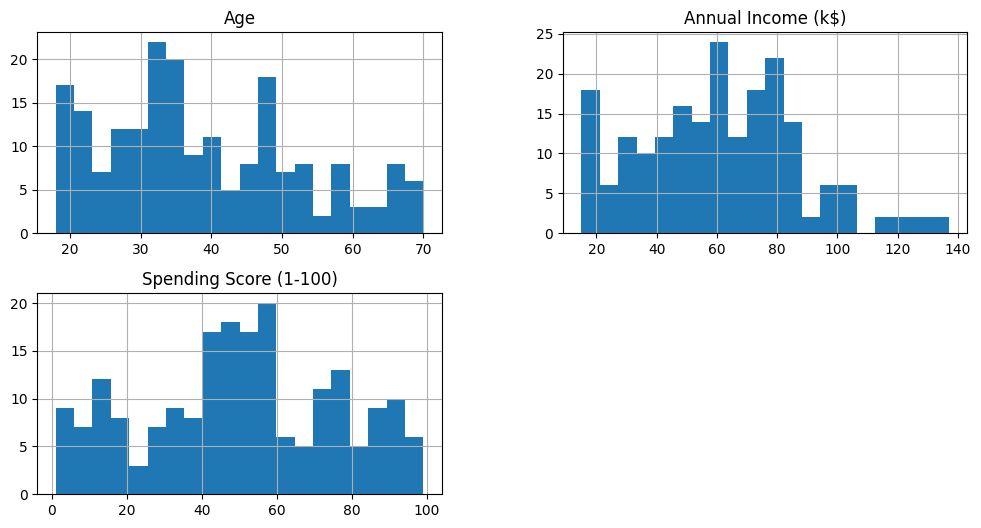

In [10]:
#data distribution of age, spending score and annual income
import matplotlib.pyplot as plt

df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=20, figsize=(12,6))
plt.show()


In [43]:
from sklearn.cluster import KMeans

In [13]:
#Income and spending score are features used for customer segmentation
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


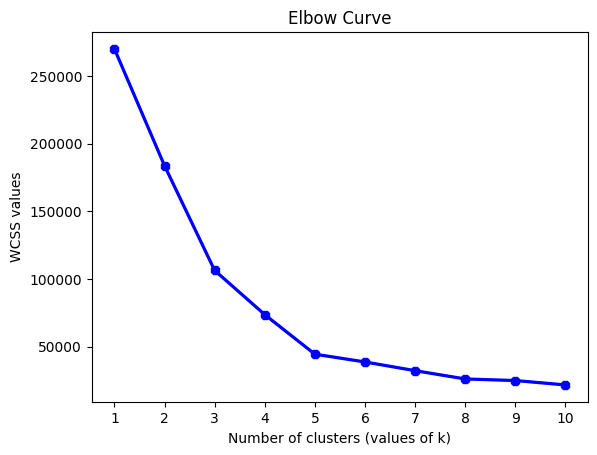

In [54]:
#using elbow method to find cluster numbers
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)


plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.3, color="blue", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()


In [27]:
k_means = KMeans(n_clusters=5, n_init="auto")

# Fitting the input
k_means.fit(X)

# Predicting the labels of the input
y_pred = k_means.predict(X)

# Adding the labels
df["label"] = y_pred

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,label
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,3,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,3,4
4,5,Female,31,17,40,0,0


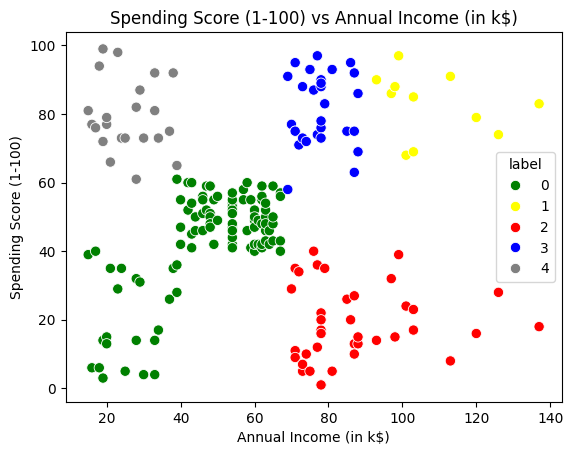

In [40]:
#visualizing the clusters
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["green", "yellow", "red", "blue", "grey"]

sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="label",
    palette=colors,
    legend="full",
    data=df,
    s=55
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()


Insights:

Cluster 0 (Green) ->  Low Income, Low to Mid Spending
                  ->  Lower-income customers.
                  ->  Average spenders.

Cluster 1 (Yellow)->  High Income, High Spending
                  
Cluster 2 (Red)   ->  High Income, Low Spending
                  ->  High earners.
                  ->  Spending Score is very low

Cluster 3 (Blue)  ->  Middle-to-high income group.
                  ->  High spending habits

Cluster 4 (Grey)  -> Lower income.
                  -> High spenders              
